# Linear Regression (Pytorch)

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

# 设置seed
seed=123
np.random.seed(seed)
torch.manual_seed(seed)

## Data: Inputs & Labels

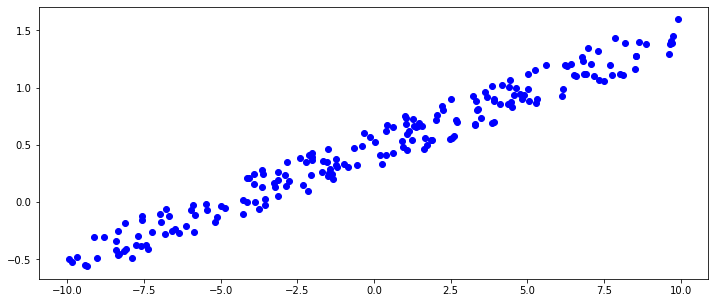

In [2]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.uniform(0, 0.35, n)
    y = (m * x + b) + noise
    return x.astype(np.float32), y.astype(np.float32)

x, y = generate_data()
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.scatter(x, y, c="b", label="samples")

## Linear Regression Model with Pytorch

In [3]:
class LinearRegressionPTHCustomize(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.Tensor(1, 1).uniform_(-.1, .1))
        self.b = nn.Parameter(torch.Tensor(1).uniform_(-.1, .1))
    
    def forward(self, x):
        return x @ self.w + self.b

In [4]:
class LinearRegressionPTH(nn.Module):
    def __init__(self):
        super(LinearRegressionPTH, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)
    

## Train the Model

In [5]:
lr = 0.01
eps= 300

# data preparation
x_data = torch.from_numpy(x).view(-1, 1)
y_data = torch.from_numpy(y).view(-1, 1)

In [6]:


torch_model = LinearRegressionPTH()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=lr)

for epoch in range(eps):
    y_pred = torch_model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}: Loss {loss.data}")

Epoch 50: Loss 0.03703941032290459
Epoch 100: Loss 0.014131804928183556
Epoch 150: Loss 0.011092829518020153
Epoch 200: Loss 0.010689674876630306
Epoch 250: Loss 0.010636191815137863
Epoch 300: Loss 0.010629096068441868


## Results

Text(0, 0.5, 'y')

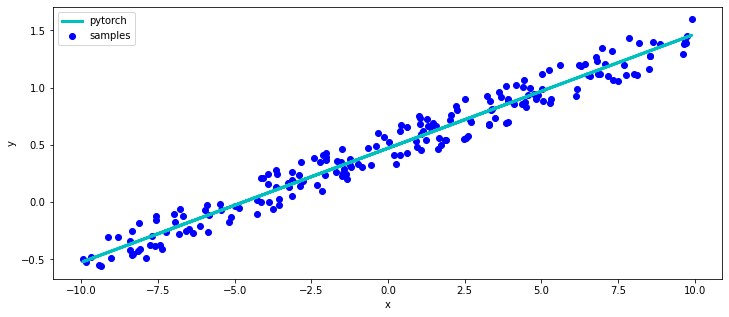

In [7]:
predicted = torch_model(x_data).detach().numpy()

plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
ax.scatter(x_data.detach().numpy(), y_data.detach().numpy(), c="b", label="samples")
ax.plot(x_data.detach().numpy(), predicted, "c", linewidth=3.0, label="pytorch")
ax.legend()
plt.xlabel("x")
plt.ylabel("y")